# Using the CRISP-DM Method for MLN 601 Machine Learning
#Assessment 1: Regression Analysis







Adapted from Smart Vision Europe (2020)https://www.sv-europe.com/crisp-dm-methodology/ and Patience (2018) https://grantpatience.com/2018/10/30/applying-crisp-dm-to-data-science-and-a-re-usable-template-in-jupyter/

CRISP-DM is a process used to guide data mining and machine learning projects. It breaks down the work into six main steps to help data teams solve problems in an organized way.

First, there's the Business Understanding phase. This is where the team figures out what the company or organization needs and how data can help. It's about setting clear goals based on business priorities.

Next is Data Understanding, where the team collects the data they need and starts exploring it. They check the data for problems and try to spot any patterns or insights early on.

In the Data Preparation phase, the team gets the data ready for analysis. They clean it up, fix any mistakes, and choose the parts that are most useful for the project.

Then comes Modeling. This is where the team applies different algorithms or techniques to the data to create models that can predict outcomes or find patterns. They might try several methods to see which works best.

Once the models are built, the team moves to Evaluation. Here, they check how well the models perform and make sure they meet the goals set in the first phase. If the models don’t work as expected, they might need to go back and make adjustments.

Finally, in Deployment, the results are put into action. This could mean creating reports, making business decisions, or integrating the model into a company's systems.

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor"></a>
This stage focuses on understanding the project's goals from a business perspective. It involves identifying the main problem or question the business wants to solve and defining the data mining objectives that align with those goals. The team works closely with stakeholders to clarify what the business needs and translates those needs into a clear plan for the data analysis. The goal is to ensure that the project stays focused on delivering value to the business.

## 1.1 Assess the Current Situation<a class="anchor"></a>

The data represents the quality of it's data, which is red wine. There are 1599 entries in the data with 12 different variables which are as follows
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality (score between 0 and 10)

In the context of a winery, it is important to ensure that the quality of wine is as high as possible, to ensure a satisified and returning customer base. Through this data, patterns can be recognized to ensure which variables play a significant part in ensuring the quality of the wine and how these variables together can ensure a satisfactory product.

# 2. Stage  Two - Data Understanding <a class="anchor"></a>
In this phase, the user gathers and explores the data they will use for the project. They examine the data to understand its structure, patterns, and quality, checking for any issues like missing or inconsistent values. The goal is to gain insights into the data and assess whether it’s suitable for the project, while also identifying any initial patterns that might help in the later stages of modeling and analysis.

## 2.1 Initial Data Acquisition <a class="anchor"></a>
The data being used was acquied from https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009. The original link assigned in the assessment brief downloaded the CSV file incorrectly, and after multiple tries, I had to use Kaggle. The dataset is the same and from the same source, however. The CSV file was then exported to my Google Drive, as I am using Google Colab to write this code.

In [48]:
# Import Libraries Required

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings(action='ignore')

In [19]:
#Data source:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Source Query location:
wine = pd.read_csv("/content/drive/My Drive/dataset/winequality-red.csv")

## 2.2 Describe Data <a class="anchor"></a>
Once the data was mounted, I examined a randomized sample of 10 along with the information of all variables. I found that none of the variables had a null value, making my data complete and the cleaning part simpler. I also asked for information such as the count, mean, standard deviation, minmimum, and maximum amount of each variable. The number of instances assigned to each quality number associated was also displayed.

In [22]:
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
463,8.1,0.660,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,9.0,5
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4
333,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,5
757,8.1,0.870,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,5
1290,7.6,0.740,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0,5
655,9.7,0.550,0.17,2.9,0.087,20.0,53.0,1.00040,3.14,0.61,9.4,5
962,6.6,0.570,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5
520,9.8,0.250,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.0,6


In [23]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
wine.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [26]:
wine['quality'].describe()

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


## 2.3 Verify Data Quality <a class="anchor"></a>

### 2.3.1. Outliers <a class="anchor"></a>
As mentioned earlier, there were no outliers or null values in this dataset. I checked again and the display results were the same.

In [27]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## 2.4 Initial Data Exploration  <a class="anchor"></a>
The histogram of each variable was viewed. The mean values of each available quality number was also displayed, showing some relationship between quality and volatile acidity, citric acid, pH, sulphates, and alcohol. The diversity of the quality within the dataset was also displayed in a plot chart.

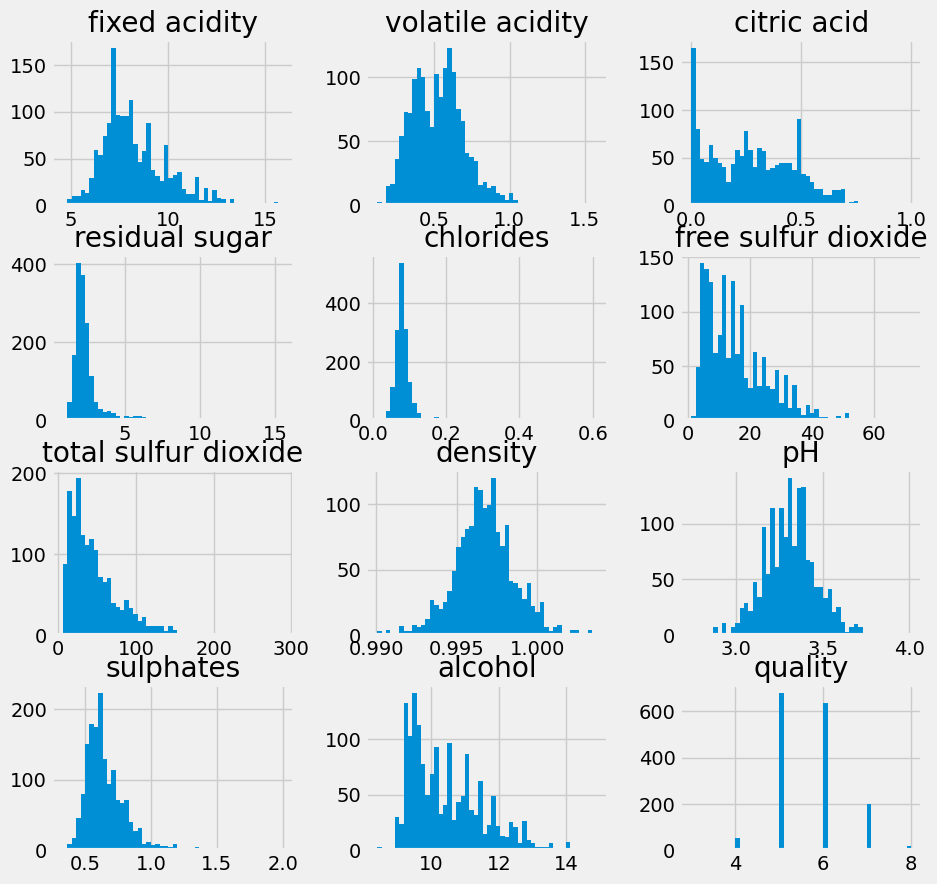

In [31]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
quality,,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000,0.0
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,0.0
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,0.0
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,0.0
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,1.0
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,1.0


<ipython-input-78-9cd0c43317e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['quality'])


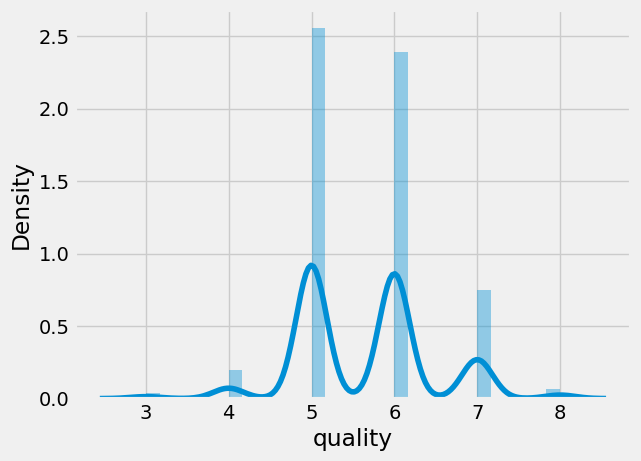

In [78]:
sns.distplot(wine['quality'])
plt.show()

### 2.4.2 Correlations  <a class="anchor"></a>
I added a heatmap that shows the correlation between each variable with each other. Then the relationship/dependency quality has with variables such as volatile acidity, citric acid, sulphates, and alcohol was added on a scatter plot for each to determine a visual pattern.

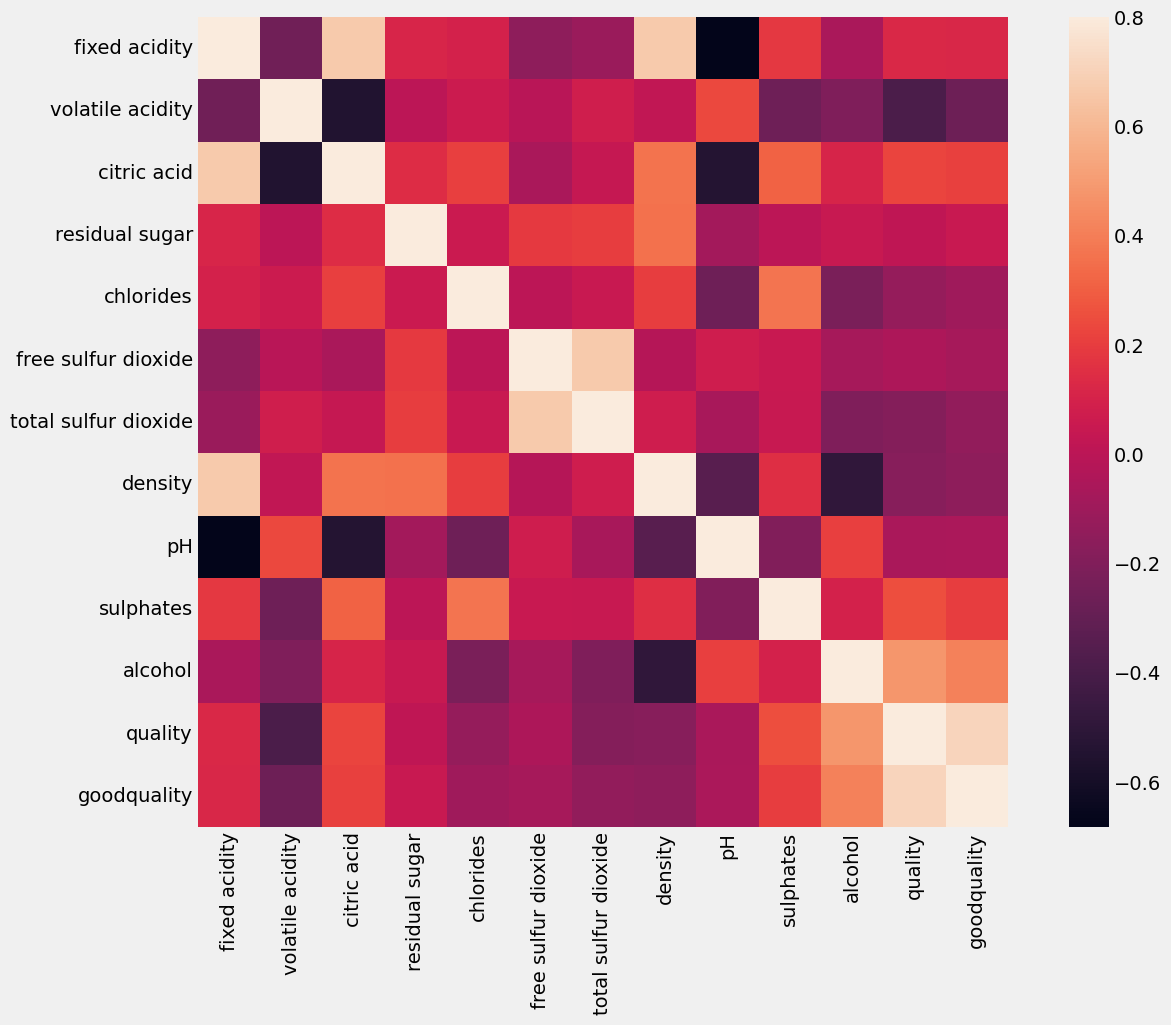

In [79]:
corrmat = wine.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

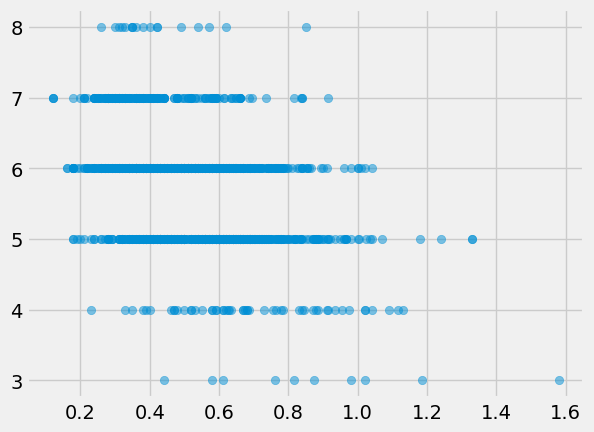

In [83]:
x = wine['volatile acidity']
y = wine['quality']
plt.scatter(x,y, alpha = 0.5)
plt.show()

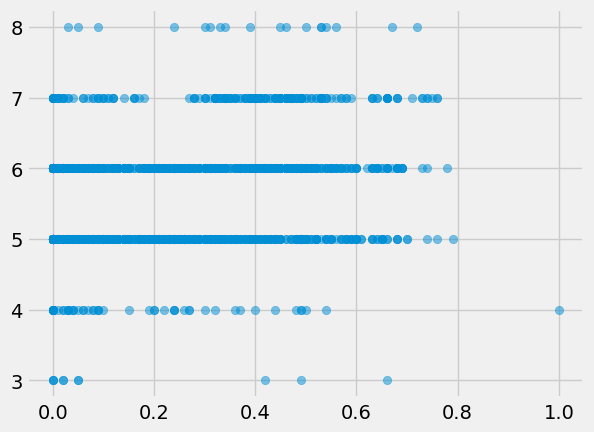

In [84]:
x = wine['citric acid']
y = wine['quality']
plt.scatter(x,y, alpha = 0.5)
plt.show()

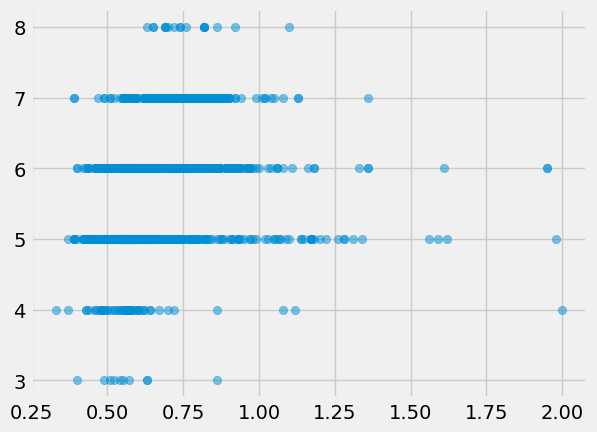

In [88]:
x = wine['sulphates']
y = wine['quality']
plt.scatter(x,y, alpha = 0.5)
plt.show()

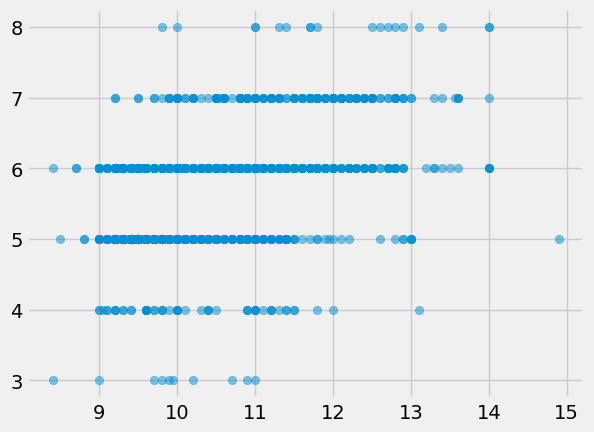

In [89]:
x = wine['alcohol']
y = wine['quality']
plt.scatter(x,y, alpha = 0.5)
plt.show()

# 3. Stage Three - Data Preparation <a class="anchor"></a>


## 3.1 Select Your Data <a class="anchor"></a>
The quality instances that existed in the dataset were singled out, which were 3, 4, 5, 6, 7, 8. The numbers 0, 1, 2, 9, and 10 were not in the dataset, thus they were omitted.

In [34]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## 3.2 Clean The Data <a class="anchor"></a>
An assumption was made in the dataset source that any quality rating that was equal to or more than 7 were considered good. A new variable was added, where instead of relating to each rating individually, there was a binary rating to whether the quality of a wine was good or bad. Any wine with a rating of 7 and more was of good quality, therefore being a 1, anything under 7 was not of good quality, therefore being 0. The total number of good and bad quality wines was also displayed.

In [35]:
# If wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
742,6.5,0.615,0.00,1.9,0.065,9.0,18.0,0.99720,3.46,0.65,9.2,5,0
465,10.0,0.290,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.7,5,0
218,7.5,0.490,0.19,1.9,0.076,10.0,44.0,0.99570,3.39,0.54,9.7,5,0
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6,0
433,12.3,0.390,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,5,0


In [36]:
# See total number of good vs bad wines samples
wine['goodquality'].value_counts()

,count
goodquality,
0,1382
1,217


# 4. Stage Four - Modelling <a class="anchor"></a>
As the data preprocessing step showed that there were multiple variables that had a pattern in terms of quality, I decided to use multiple linear regression as my model. I added all the variables beside "quality" and "goodquality" as the independent value while "goodquality" was considered the independent value.


In [37]:
# Separate depedent and indepedent variables
X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [38]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [39]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [73]:
model_res=pd.DataFrame(columns=['Model', 'Score'])

## 4.1. Modelling technique <a class="anchor"></a>
The train_test_split technique was used, where I used the basic ratio of 80% for training the data and 20% for testing the data.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=200)

## 4.2. Modelling assumptions <a class="anchor"></a>
As there are no null values, there won't be any missing variables. The null quality ratings that weren't in the dataset were also omitted earlier.

In [93]:
lr_data_train=data_train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
lr_data_test=data_test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
lr_label_train=label_train
lr_label_test=label_test

## 4.3. Build Model <a class="anchor"></a>
I ran the model and unfortunaly the results were low, showing that something in the model had gone wrong.

In [75]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(lr_data_train, lr_label_train)
lr_score_train = lr.score(lr_data_train, lr_label_train)
print("Training score: ",lr_score_train)
lr_score_test = lr.score(lr_data_test, lr_label_test)
print("Testing score: ",lr_score_test)

Training score:  0.36493113771799457
Testing score:  0.3281531937593546


0.3281531937593546

## 4.4. Assess Model <a class="anchor"></a>
After trying multiple tries in the linear regression model, I attempted the logistic regression model which provided a higher score of 0.8875.

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
# accuracy_score(Y_test,Y_pred)
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
model_res

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Score
0,LogisticRegression,0.8875


# 5. Stage 5 - Evaluate  <a class="anchor"></a>
The model of multiple linear regression failed to produce satisfactory results for me, therefore, I had to opt for logistic regression to find better patterns between the variables.

# 6. Stage 6 - Deploy  <a class="anchor"></a>

As this assessment did not require proper deployment, it was interesting to test out different codes to display information visually and attempt different models. Due to the limitation of the assessment requirements, I was unable to try different models beyond regression such as classification. I am, however, eager to try those out in the future.

